In [317]:
# Study partner is Nicole Lund.  Worked on Pseudo code together.
# Received assistance from instructor via office hours and tutoring sessions.
# The starter code and pseudo code for this challenge was provided and can be reviewed in folder 
# Resources:  https://drive.google.com/file/d/1UHK8wtWbADvHKXFC937IS6MTnlSZC_zB/view, past class assignments, and Google searches
# Three Observations:
    # 1.
    # 2.
    # 3.

## Observations and Insights 

In [318]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata= pd.read_csv(mouse_metadata_path)
study_results= pd.read_csv(study_results_path)
df_combined_data=pd.merge(mouse_metadata,study_results)

df_combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [319]:
# Checking the number of mice.
# num_mice_combined = number of unique Mouse IDs
num_mice_combined=df_combined_data["Mouse ID"].nunique()
num_mice_combined


249

In [320]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_combined_clean=df_combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID
df_combined_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [321]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
df_regimen_group=df_combined_clean.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
df_regimen_group_median=df_regimen_group['Tumor Volume (mm3)'].median()
df_regimen_group_mean=df_regimen_group['Tumor Volume (mm3)'].mean()
df_regimen_group_variance=df_regimen_group['Tumor Volume (mm3)'].var()
df_regimen_group_standard=df_regimen_group['Tumor Volume (mm3)'].std()
df_regimen_group_sem=df_regimen_group['Tumor Volume (mm3)'].sem()

df_regimen_group_median

### new DF of groupby "Drug Regimen"
df_stats_table=pd.DataFrame(
    {"Mean": df_regimen_group_mean,
    "Median": df_regimen_group_median,
    "Variance": df_regimen_group_variance,
    "Std Dev": df_regimen_group_standard,
    "SEM": df_regimen_group_sem})
    
df_stats_table


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [322]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_stats_table_one_line=df_combined_clean.groupby("Drug Regimen")

# Using the aggregation method, produce the same summary statistics in a single line
df_stats_table_one_line.agg({"Tumor Volume (mm3)": ["mean", "median","var","std","sem"]})

#Combined two (chaining)
df_stats_table_favorite_one_line=df_combined_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median","var","std","sem"]})

df_stats_table_favorite_one_line

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [323]:
df_combined_clean


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


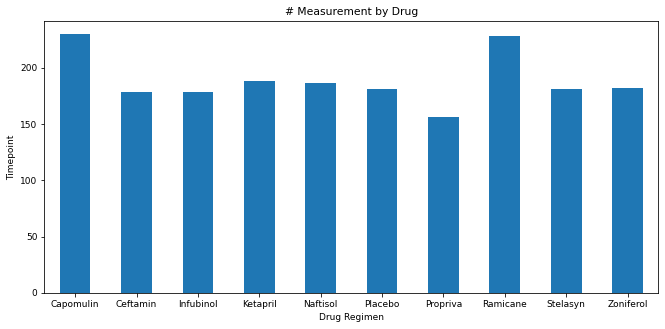

In [334]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#value counts of drug regimen
df_measurement_count=df_combined_clean.groupby("Drug Regimen").count().reset_index()
df_measurement_plot=df_measurement_count.plot.bar(x='Drug Regimen',y='Timepoint',rot=0,figsize=(11,5))
plt.title("# Measurement by Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
df_measurement_plot.get_legend().remove()
plt.show()

#df_measurement_count


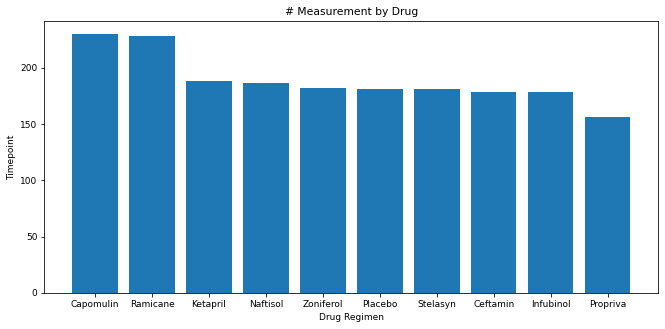

In [325]:
# # Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimen_count=df_combined_clean['Drug Regimen'].value_counts().to_list()
drug_regimen=df_combined_clean['Drug Regimen'].value_counts().index.to_list()

# # Create an array & datasets
Regimen=["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

# #Plotting
ax=plt.subplots(figsize=(11,5))
plt.bar(drug_regimen,drug_regimen_count)
plt.title("# Measurement by Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.show()


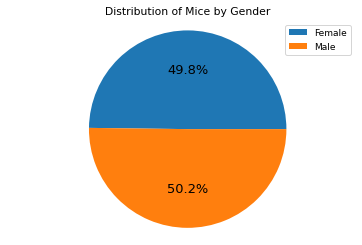

In [326]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#data
df_mice_gender=df_combined_clean.groupby(['Sex'])['Mouse ID'].nunique()

#Formatting
fig1=df_mice_gender.plot.pie(labels=["",""],autopct='%1.1f%%',fontsize=13,legend=True,title="Distribution of Mice by Gender")
fig1.legend(labels=df_mice_gender.index)
plt.ylabel(" ")
plt.axis("equal")
plt.show()

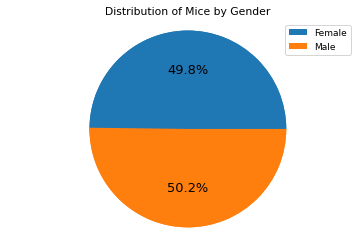

In [327]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender_count=df_combined_clean['Sex'].value_counts().to_list()
plt.pie(mice_gender_count)

#Formatting
fig2=df_mice_gender.plot.pie(labels=["",""],autopct='%1.1f%%',fontsize=13,legend=True,title="Distribution of Mice by Gender")
fig2.legend(labels=df_mice_gender.index)
plt.ylabel(" ")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [328]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  Capomulin, Ramicane, Infubinol, and Ceftamin

# four_regimens=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
df_four_regimens=df_combined_clean.loc[df_combined_clean['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
df_max_time=df_four_regimens.groupby("Mouse ID").max().reset_index()
df_four_regimens

## Merge this group df with the original dataframe to get the tumor volume at the last timepoint
##reference, https://stackoverflow.com/questions/53747080/broadcast-groupby-result-as-new-column-in-original-dataframe
#pd.merge on two columns

last_tumor_volume=df_max_time[["Mouse ID", "Timepoint"]].merge(df_four_regimens,on=["Mouse ID", "Timepoint"],how='left')
last_tumor_volume


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [329]:
# Put treatments into a list for for loop (and later for plot labels)
#take drug regimen column, to become list
four_regimens=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]
list_four_regimens=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#formula for IQR; subtract 25 percentile from 75 percentile
for regimen in four_regimens:

# Locate the rows which contain mice on each drug and get the tumor volumes
    df_tumor_volume=last_tumor_volume.loc[last_tumor_volume['Drug Regimen']==regimen, 'Tumor Volume (mm3)']
   
# add subset 
    tumor_volume.append(df_tumor_volume)   

# Determine outliers using upper and lower bounds; refer to lesson plan 5.3; isolate outlier
    Quartiles=df_tumor_volume.quantile([0.25,.5,.75])
    IQR=Quartiles[.75]-Quartiles[0.25]
    print (IQR)
    lowerq=Quartiles[0.25]
    upperq=Quartiles[.75]
    lower_bound=lowerq-(1.5*IQR)
    upper_bound=upperq+(1.5*IQR)
    print(f"Values below{lower_bound} could be outliers.")
    print(f"Values above{upper_bound} could be outliers.")
   
    final_tumor_volume=df_tumor_volume.loc[(df_tumor_volume<lower_bound)|(df_tumor_volume>upper_bound)]
####################################################################################################### list_four_regimens.append(['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])
    # df_list_four_regimens=list_four_regimens
    # list_four_regimens=df_tumor_volume[["Drug Regimen", "Tumor Volume (mm3)"]].merge(list_four_regimens,on=["Drug Regimen", "Tumor Volume (mm3)"],how='left')
    print(f"{final_tumor_volume} are outliers.") 
    # list_four_regimens
#create a df; use append; created lists for each drug type

7.781863460000004
Values below20.70456164999999 could be outliers.
Values above51.83201549 could be outliers.
Series([], Name: Tumor Volume (mm3), dtype: float64) are outliers.
9.098536719999998
Values below17.912664470000003 could be outliers.
Values above54.30681135 could be outliers.
Series([], Name: Tumor Volume (mm3), dtype: float64) are outliers.
11.477135160000003
Values below36.83290494999999 could be outliers.
Values above82.74144559000001 could be outliers.
15    36.321346
Name: Tumor Volume (mm3), dtype: float64 are outliers.
15.577752179999997
Values below25.355449580000002 could be outliers.
Values above87.66645829999999 could be outliers.
Series([], Name: Tumor Volume (mm3), dtype: float64) are outliers.


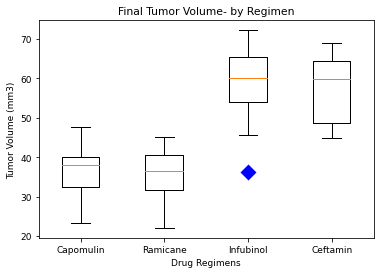

In [330]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#create df with regimen, id, and tumor volume at each range (use pivot function in pd); cheat sheet or use a nested list at the same time as creating the plot outliers

flierprops = dict(marker='D', markerfacecolor='blue', markersize=12,
                  markeredgecolor='none')
plt.boxplot(tumor_volume,labels=four_regimens,flierprops=flierprops)
plt.title("Final Tumor Volume- by Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Tumor Volume (mm3)")

plt.show() 


## Line and Scatter Plots

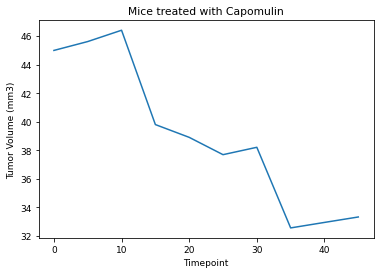

In [335]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#use df_combined_clean, reference regimen column, variable is Capomulin

#select one mouse(m957) and pull out timepoint and tumor data (two columns); pull out a df by using the loc command and conditional statement in rows.  Not necessary to use groupby.  Create pd scatterplot after
df_regimen_Capomulin=df_combined_clean.loc[df_combined_clean['Drug Regimen']=='Capomulin']
df_mouse_m957=df_regimen_Capomulin.loc[df_combined_clean['Mouse ID']=='m957']
df_mouse_m957
ay=df_mouse_m957.plot(x="Timepoint", y="Tumor Volume (mm3)")
plt.title("Mice treated with Capomulin")
plt.ylabel("Tumor Volume (mm3)")
ay.get_legend().remove()
plt.show()


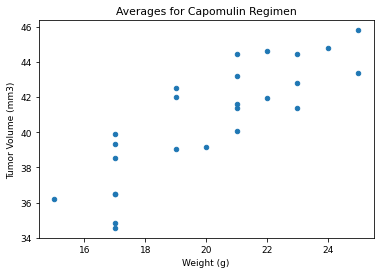

In [332]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df_average_Capomulin=df_regimen_Capomulin.groupby("Mouse ID").mean()
df_average_Capomulin.plot.scatter("Weight (g)","Tumor Volume (mm3)")

# Formatting
plt.title("Averages for Capomulin Regimen")
plt.show()


## Correlation and Regression

The correlation between both factors is 0.84


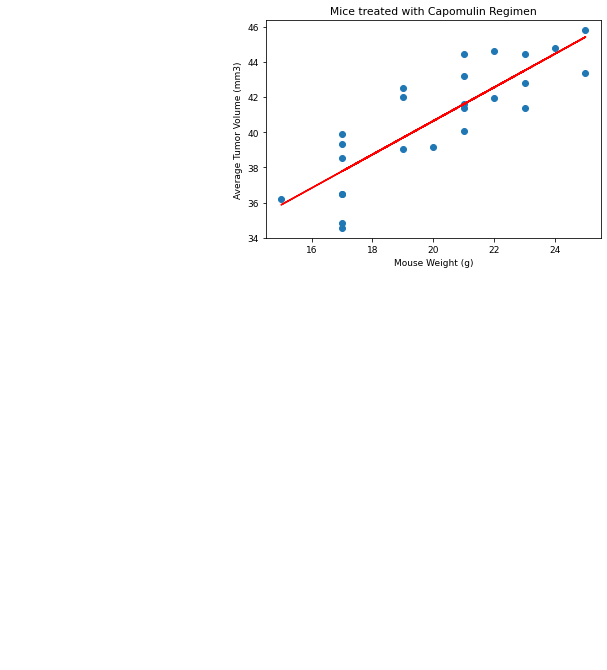

In [333]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#Reference code:  Solved lesson plans for 5.3.06 & 5.3.08
#######################################################################################################
# Add the linear regression equation and line to plot
# x_values = mouse_weight['MW']#Avg weight column from groupby; #df_average_Capomulin=df_regimen_Capomulin.groupby("Mouse ID").mean()
# y_values = average_tumor_volume['ATV']#sub in the average weight column into mx + b =y (linear function); # df_regimen_Capomulin.plot.scatter("Weight (g)","Tumor Volume (mm3)")
# (slope, intercept, rvalue, pvalue, stderr) = scipy stats

mouse_weight = df_average_Capomulin['Weight (g)']
average_tumor_volume = df_average_Capomulin['Tumor Volume (mm3)']
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")
regression=st.linregress(mouse_weight,average_tumor_volume)
regression
regress_values = mouse_weight * regression[0] + regression[1]
plt.scatter(mouse_weight,average_tumor_volume)#plot x versus y
plt.plot(mouse_weight,regress_values,"r-")
line_eq = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Mice treated with Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

